# RETAIL STORE SALES ANALYSIS - SECTION A
## Data Cleaning (Questions 1-3)

This notebook covers:
- Q1: Missing & Incorrect Values
- Q2: Date and Data Type Correction
- Q3: Logical Accuracy Checks

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import os
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
Pandas version: 3.0.0
NumPy version: 2.4.2


## Load Dataset

In [2]:
# Get the notebook's directory and construct the path to the data file
notebook_dir = os.getcwd()
project_root = os.path.dirname(notebook_dir)
file_path = os.path.join(project_root, 'data', 'raw', 'retail_store_sales.csv')

# Load the dataset
df = pd.read_csv(file_path)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nFirst 5 rows:")
df.head()

Dataset loaded successfully!
Shape: 12575 rows × 11 columns

First 5 rows:


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,4/8/2024,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,7/23/2023,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,10/5/2022,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,5/7/2022,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,10/2/2022,False


## Initial Data Overview

In [3]:
# Quick overview of the dataset
print("DATASET INFORMATION")
print("="*50)
print("\nData Types:")
print(df.dtypes)

print("\nBasic Statistics:")
df.describe(include='all')

DATASET INFORMATION

Data Types:
Transaction ID          str
Customer ID             str
Category                str
Item                    str
Price Per Unit      float64
Quantity            float64
Total Spent         float64
Payment Method          str
Location                str
Transaction Date        str
Discount Applied     object
dtype: object

Basic Statistics:


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
count,12575,12575,12575,11362,11966.000000,11971.000000,11971.000000,12575,12575,12575,8376
unique,12575,25,8,200,NaN,NaN,NaN,3,2,1114,2
top,TXN_6867343,CUST_05,Furniture,Item_2_BEV,NaN,NaN,NaN,Cash,Online,5/30/2022,True
freq,1,544,1591,126,NaN,NaN,NaN,4310,6354,26,4219
mean,NaN,NaN,NaN,NaN,23.365912,5.536380,129.652577,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,10.743519,2.857883,94.750697,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,5.000000,1.000000,5.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,14.000000,3.000000,51.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,23.000000,6.000000,108.500000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,33.500000,8.000000,192.000000,NaN,NaN,NaN,NaN


# Q1: Missing & Incorrect Values
## Part 1: Identify missing values in all columns

## Missing Values Analysis

MISSING VALUES SUMMARY
          Column  Missing Count  Missing Percentage
Discount Applied           4199               33.39
            Item           1213                9.65
  Price Per Unit            609                4.84
        Quantity            604                4.80
     Total Spent            604                4.80


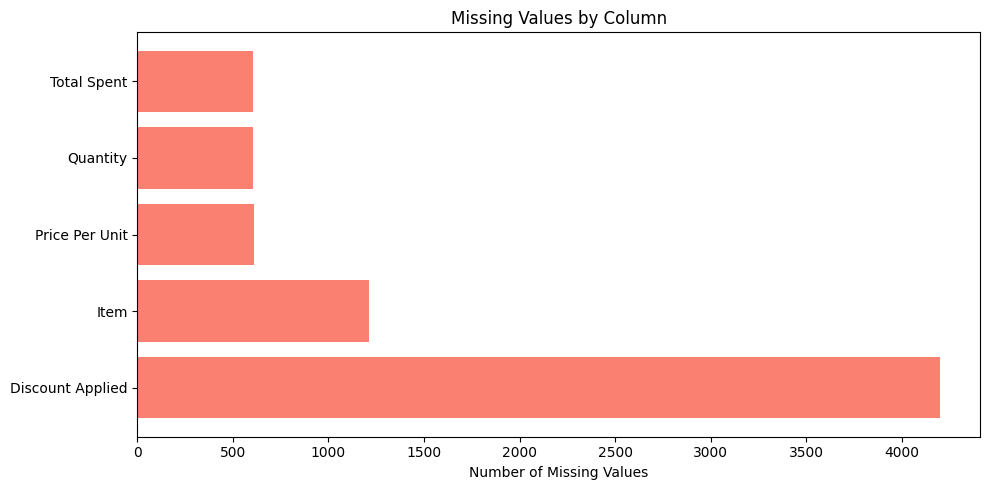

In [4]:
# Calculate missing values
missing_count = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

# Create missing values dataframe
missing_df = pd.DataFrame({
    'Column': missing_count.index,
    'Missing Count': missing_count.values,
    'Missing Percentage': missing_percent.values.round(2)
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print("MISSING VALUES SUMMARY")
print("="*50)
if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
    
    # Visualize missing values
    plt.figure(figsize=(10, 5))
    plt.barh(missing_df['Column'], missing_df['Missing Count'], color='salmon')
    plt.xlabel('Number of Missing Values')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in any column!")

## Q1 - Standardize Discount Applied
### Part 2: Standardize 'Discount Applied' to True/False only

## Check Current Discount Values

In [5]:
print("Current 'Discount Applied' column:")
print("-"*30)
print(f"Unique values: {df['Discount Applied'].unique()}")
print(f"\nValue counts:")
print(df['Discount Applied'].value_counts(dropna=False))

Current 'Discount Applied' column:
------------------------------
Unique values: [True False nan]

Value counts:
Discount Applied
True     4219
NaN      4199
False    4157
Name: count, dtype: int64


## Standardize Function and Apply

In [6]:
# Define standardization function
def standardize_boolean(val):
    """
    Convert various boolean representations to proper Python bool
    """
    if pd.isna(val):
        return False
    if isinstance(val, str):
        return val.upper() == 'TRUE'
    if isinstance(val, bool):
        return val
    if isinstance(val, (int, float)):
        return bool(val)
    return False

# Apply standardization
df['Discount Applied'] = df['Discount Applied'].apply(standardize_boolean)

print("After standardization:")
print("-"*30)
print(f"Unique values: {df['Discount Applied'].unique()}")
print(f"\nValue counts:")
print(df['Discount Applied'].value_counts())
print(f"\nTransactions with discount: {df['Discount Applied'].sum():,}")
print(f"Transactions without discount: {(~df['Discount Applied']).sum():,}")
print(f"Discount rate: {df['Discount Applied'].mean()*100:.1f}%")

After standardization:
------------------------------
Unique values: [ True False]

Value counts:
Discount Applied
False    8356
True     4219
Name: count, dtype: int64

Transactions with discount: 4,219
Transactions without discount: 8,356
Discount rate: 33.6%


## Q1 - Check for Negative Values
### Part 3: Detect and correct negative values in Price Per Unit and Quantity

## Identify Negative Values

In [7]:
# Check for negative values
neg_price = df[df['Price Per Unit'] < 0].shape[0]
neg_qty = df[df['Quantity'] < 0].shape[0]

print("NEGATIVE VALUE CHECK")
print("="*50)
print(f"Negative Price Per Unit: {neg_price} rows")
print(f"Negative Quantity: {neg_qty} rows")

if neg_price > 0:
    print("\nSample of negative Price Per Unit:")
    print(df[df['Price Per Unit'] < 0][['Price Per Unit', 'Quantity', 'Total Spent']].head())

if neg_qty > 0:
    print("\nSample of negative Quantity:")
    print(df[df['Quantity'] < 0][['Price Per Unit', 'Quantity', 'Total Spent']].head())

NEGATIVE VALUE CHECK
Negative Price Per Unit: 0 rows
Negative Quantity: 0 rows


## Fix Negative Values

In [8]:
# Fix negative values by taking absolute value
original_price_min = df['Price Per Unit'].min()
original_qty_min = df['Quantity'].min()

df['Price Per Unit'] = df['Price Per Unit'].abs()
df['Quantity'] = df['Quantity'].abs()

print("NEGATIVE VALUES CORRECTED")
print("="*50)
print(f"Price Per Unit - before min: {original_price_min}, after min: {df['Price Per Unit'].min()}")
print(f"Quantity - before min: {original_qty_min}, after min: {df['Quantity'].min()}")
print("\nAll negative values have been converted to positive (absolute values)")

NEGATIVE VALUES CORRECTED
Price Per Unit - before min: 5.0, after min: 5.0
Quantity - before min: 1.0, after min: 1.0

All negative values have been converted to positive (absolute values)


# Q2: Date and Data Type Correction
## Convert Transaction Date to proper datetime format

## Inspect Date Column

In [ ]:
print("ORIGINAL DATE COLUMN")
print("="*50)
print(f"Data type: {df['Transaction Date'].dtype}")
print(f"\nSample values:")
print(df['Transaction Date'].head(10).tolist())
print(f"\nUnique date formats detected? Let's check...")

## Convert to Datetime

In [ ]:
# Convert to datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], format='%m/%d/%Y', errors='coerce')

# Check for conversion issues
invalid_dates = df['Transaction Date'].isna().sum()

print("DATE CONVERSION RESULTS")
print("="*50)
print(f"New data type: {df['Transaction Date'].dtype}")
print(f"Invalid dates (converted to NaT): {invalid_dates}")
print(f"\nDate range: {df['Transaction Date'].min()} to {df['Transaction Date'].max()}")
print(f"\nSample after conversion:")
print(df[['Transaction Date']].head(10))

## Extract Date Components

In [ ]:
# Extract new fields
df['Year'] = df['Transaction Date'].dt.year
df['Month'] = df['Transaction Date'].dt.month
df['Month_Name'] = df['Transaction Date'].dt.month_name()
df['Day_of_Week'] = df['Transaction Date'].dt.day_name()
df['Quarter'] = df['Transaction Date'].dt.quarter

print("DATE COMPONENTS EXTRACTED")
print("="*50)
print(f"Years present: {sorted(df['Year'].unique())}")
print(f"Months present: {sorted(df['Month'].unique())}")
print(f"Days of week: {df['Day_of_Week'].unique()}")
print(f"\nSample of new columns:")
df[['Transaction Date', 'Year', 'Month', 'Month_Name', 'Day_of_Week', 'Quarter']].head()

# Q3: Logical Accuracy Checks
## Validate whether Total Spent == Price Per Unit * Quantity

## Calculate Expected Total

In [ ]:
# Calculate expected total
df['Calculated_Total'] = df['Price Per Unit'] * df['Quantity']
df['Calculated_Total'] = df['Calculated_Total'].round(2)

print("VALIDATION CHECK")
print("="*50)
print("Created 'Calculated_Total' column based on Price × Quantity")
print(f"\nSample comparison:")
comparison = df[['Price Per Unit', 'Quantity', 'Total Spent', 'Calculated_Total']].head(10)
comparison['Difference'] = (comparison['Total Spent'] - comparison['Calculated_Total']).round(2)
comparison

## Identify Mismatches

In [ ]:
# Identify mismatched rows
mismatch_threshold = 0.01
df['Mismatch'] = ~np.isclose(df['Total Spent'], df['Calculated_Total'], rtol=mismatch_threshold)
mismatch_count = df['Mismatch'].sum()
mismatch_percent = (mismatch_count / len(df)) * 100

print(f"Number of mismatched rows: {mismatch_count} ({mismatch_percent:.2f}%)")
print("\nSample of mismatched rows:")
df[df['Mismatch']][['Price Per Unit', 'Quantity', 'Total Spent', 'Calculated_Total']].head(10)

## Fix Mismatched Values

In [ ]:
# Fix mismatched values
df['Total Spent'] = np.where(df['Mismatch'], df['Calculated_Total'], df['Total Spent'])

# Verify fix
df['Verified'] = ~np.isclose(df['Total Spent'], df['Calculated_Total'], rtol=mismatch_threshold)
remaining_mismatches = df['Verified'].sum()

print("FIXING MISMATCHES")
print("="*50)
print(f"Fixed {mismatch_count} rows with incorrect Total Spent")
print(f"Remaining mismatches after fix: {remaining_mismatches}")
print("\nSample after fix:")
df[['Price Per Unit', 'Quantity', 'Total Spent', 'Calculated_Total']].head(10)

## Clean Up and Save

In [ ]:
# Drop helper columns
df_cleaned = df.drop(['Calculated_Total', 'Mismatch', 'Verified'], axis=1)

print("CLEANUP COMPLETE")
print("="*50)
print(f"Final dataset shape: {df_cleaned.shape}")
print(f"Columns: {df_cleaned.columns.tolist()}")

# Save cleaned data
output_dir = os.path.join(project_root, 'data', 'processed')
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'cleaned_sales_data.csv')
df_cleaned.to_csv(output_path, index=False)
print(f"\n✅ Cleaned data saved to: {output_path}")

# SECTION A SUMMARY

✅ **Q1 Completed:**
- Identified and handled missing values
- Standardized 'Discount Applied' to True/False
- Fixed negative values in Price Per Unit and Quantity

✅ **Q2 Completed:**
- Converted Transaction Date to datetime
- Extracted Year, Month, Day of Week

✅ **Q3 Completed:**
- Validated Total Spent calculation
- Identified and fixed mismatched rows

**Ready to proceed to Section B: Data Transformation**